In [282]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns

Random Forest Analysis
Normalized Data analysis

Number of columns: 78
OOB error rate: 6.25%


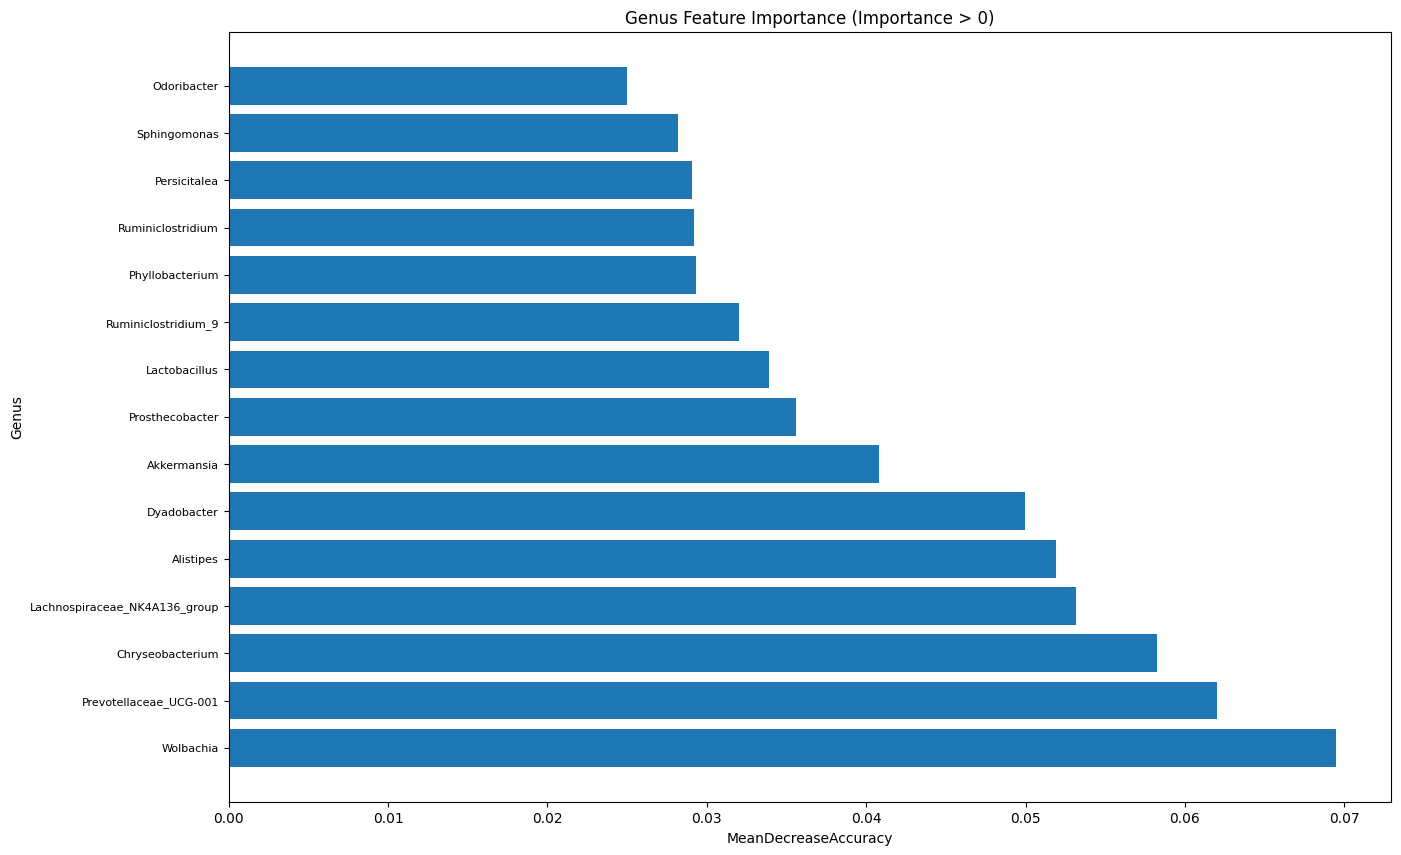

In [283]:
data = pd.read_csv('genus_table_Umar_MPD.csv')
metadata = pd.read_csv('P8_C_F.csv')

# Convert columns to numeric
data.iloc[:, 1:] = data.iloc[:, 1:].apply(pd.to_numeric)
# Low count filter
minimum_count = 4
prevalence_threshold = 0.2
# Filter features based on minimum count and prevalence threshold
filtered_data = data[data.iloc[:, 1:].ge(minimum_count).sum(axis=1) / data.shape[1] >= prevalence_threshold]
# Low variance filter
variance_cutoff = 0.1
# Filter features based on variance
data = filtered_data[filtered_data.iloc[:, 1:].var(axis=1) >= variance_cutoff]
# Select the numeric columns to normalize
numeric_columns = data.columns[1:]
scaler = MinMaxScaler()
# Normalize the numeric columns
data[numeric_columns] = scaler.fit_transform(data[numeric_columns])
otu_data_transposed = data.transpose()
new_column_names = otu_data_transposed.iloc[0]
otu_data_transposed = otu_data_transposed[1:]
otu_data_transposed.columns = new_column_names
# Reset the index and rename the index column
otu_data_transposed = otu_data_transposed.reset_index()
otu_data_transposed = otu_data_transposed.rename(columns={'index': '#NAME'})
otu_data_transposed['#NAME'] = otu_data_transposed['#NAME'].astype(str)
metadata['#NAME'] = metadata['#NAME'].astype(str)
merged_data = pd.merge(otu_data_transposed, metadata, on='#NAME')
new_columns = merged_data.columns.str.split(';').str[-1]
merged_data.columns = new_columns
merged_data = merged_data.drop(columns=['NA'])
# print(merged_data)
X = merged_data.drop('Experiment', axis=1)  # Replace 'target_variable' with the column name of your target variable
num_columns = X.shape[1]
print("Number of columns:", num_columns)
# print(X)
y = merged_data['Experiment']  # Replace 'target_variable' with the column name of your target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)
# Create a random forest classifier
rf = RandomForestClassifier(n_estimators=500,oob_score=True,random_state=42)
# Train the classifier on the training data
pre = rf.fit(X, y)
# Compute the OOB score (error rate)
oob_error_rate = 1 - rf.oob_score_
print(f"OOB error rate: {oob_error_rate:.2%}")

# Calculate the feature importances (mean decrease accuracy)
feature_importances = rf.feature_importances_
# Create a DataFrame with feature names and their importances
importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})
# Sort the DataFrame by importance in descending order
importance_df = importance_df.sort_values('Importance', ascending=False)
importance_df = importance_df.loc[importance_df['Importance'] > 0]
importance_df = importance_df.head(15)
# print(importance_df)
# Plot a horizontal bar chart
plt.figure(figsize=(15, 10))
plt.barh(importance_df['Feature'], importance_df['Importance'])
plt.xlabel('MeanDecreaseAccuracy')
plt.ylabel('Genus')
plt.title('Genus Feature Importance (Importance > 0)')
plt.yticks(fontsize=8)
# Show the plot
plt.show()


<AxesSubplot: xlabel='Experiment', ylabel='Wolbachia'>

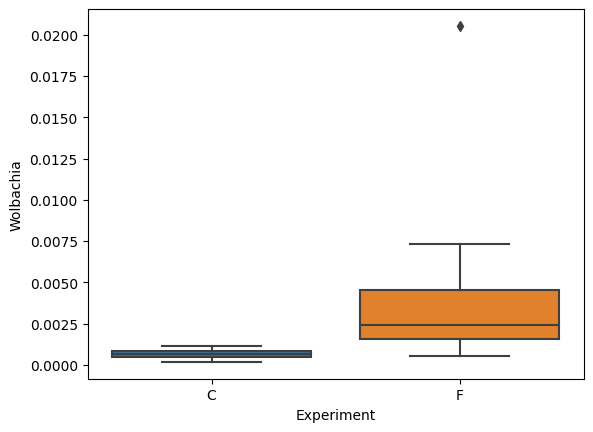

In [284]:
sns.boxplot(x = "Experiment", y = "Wolbachia", data = merged_data)

In [285]:
merged_data.head(10)

,#NAME,Lactobacillus,Escherichia/Shigella,Muribacter,Staphylococcus,Streptococcus,Enterococcus,Pseudomonas,Lachnospiraceae_NK4A136_group,Bacteroides,...,Rikenella,C39,Stenotrophomonas,Helicobacter,Shinella,Aminobacter,Coxiella,Stakelama,Novispirillum,Experiment
0,1,1.0,0.001417,0.018184,0.021171,0.063614,0.000936,0.0,0.000759,0.000734,...,0.000076,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,C
1,2,1.0,0.001745,0.015539,0.050649,0.067889,0.000293,0.000044,0.001187,0.000968,...,0.0,0.0,0.0,0.000147,0.0,0.0,0.0,0.0,0.0,C
2,3,1.0,0.001151,0.020023,0.041767,0.060665,0.000225,0.000053,0.00139,0.001072,...,0.0,0.000066,0.0,0.000132,0.0,0.0,0.00004,0.0,0.0,C
3,4,0.031415,1.0,0.00091,0.016064,0.0007,0.001469,0.0,0.004912,0.003079,...,0.00021,0.000098,0.000182,0.0,0.000294,0.000182,0.0,0.000266,0.000084,F
4,5,0.093204,1.0,0.038011,0.115261,0.008154,0.000904,0.0,0.004021,0.002987,...,0.0,0.00021,0.0,0.0,0.000355,0.000145,0.000048,0.000226,0.0,F
5,6,0.033639,1.0,0.010665,0.009731,0.003026,0.004595,0.000261,0.013803,0.006089,...,0.0,0.000448,0.00028,0.000187,0.0,0.0,0.0,0.000766,0.0,F
6,7,1.0,0.01673,0.016167,0.000118,0.063205,0.000288,0.0,0.000942,0.000693,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000052,C
7,8,1.0,0.000974,0.03134,0.000192,0.085842,0.000236,0.0,0.001107,0.00062,...,0.000074,0.0,0.0,0.000059,0.0,0.0,0.000074,0.0,0.0,C
8,9,0.204022,1.0,0.006959,0.105206,0.00347,0.001509,0.0,0.004038,0.00247,...,0.000529,0.0,0.0,0.000098,0.0,0.0,0.0,0.0,0.0,F
9,10,0.06518,1.0,0.029067,0.126616,0.012175,0.00084,0.000133,0.001887,0.001194,...,0.000044,0.0,0.000044,0.0,0.0,0.0,0.0,0.0,0.0,F


In [286]:
Experiment = merged_data['Experiment'].unique()
merged_data = merged_data.drop(columns=["Experiment"])
y_labels = merged_data['#NAME'].unique()
merged_data = merged_data.drop(columns=["#NAME"])
merged_data = merged_data.astype(float)
merged_data.head(10)

,Lactobacillus,Escherichia/Shigella,Muribacter,Staphylococcus,Streptococcus,Enterococcus,Pseudomonas,Lachnospiraceae_NK4A136_group,Bacteroides,Turicibacter,...,Elizabethkingia,Rikenella,C39,Stenotrophomonas,Helicobacter,Shinella,Aminobacter,Coxiella,Stakelama,Novispirillum
0,1.000000,0.001417,0.018184,0.021171,0.063614,0.000936,0.000000,0.000759,0.000734,0.000000,...,0.000063,0.000076,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,1.000000,0.001745,0.015539,0.050649,0.067889,0.000293,0.000044,0.001187,0.000968,0.000000,...,0.000059,0.000000,0.000000,0.000000,0.000147,0.000000,0.000000,0.000000,0.000000,0.000000
2,1.000000,0.001151,0.020023,0.041767,0.060665,0.000225,0.000053,0.001390,0.001072,0.000000,...,0.000000,0.000000,0.000066,0.000000,0.000132,0.000000,0.000000,0.000040,0.000000,0.000000
3,0.031415,1.000000,0.000910,0.016064,0.000700,0.001469,0.000000,0.004912,0.003079,0.000140,...,0.000098,0.000210,0.000098,0.000182,0.000000,0.000294,0.000182,0.000000,0.000266,0.000084
4,0.093204,1.000000,0.038011,0.115261,0.008154,0.000904,0.000000,0.004021,0.002987,0.000000,...,0.000129,0.000000,0.000210,0.000000,0.000000,0.000355,0.000145,0.000048,0.000226,0.000000
5,0.033639,1.000000,0.010665,0.009731,0.003026,0.004595,0.000261,0.013803,0.006089,0.000168,...,0.000205,0.000000,0.000448,0.000280,0.000187,0.000000,0.000000,0.000000,0.000766,0.000000
6,1.000000,0.016730,0.016167,0.000118,0.063205,0.000288,0.000000,0.000942,0.000693,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000052
7,1.000000,0.000974,0.031340,0.000192,0.085842,0.000236,0.000000,0.001107,0.000620,0.000000,...,0.000000,0.000074,0.000000,0.000000,0.000059,0.000000,0.000000,0.000074,0.000000,0.000000
8,0.204022,1.000000,0.006959,0.105206,0.003470,0.001509,0.000000,0.004038,0.002470,0.000000,...,0.000098,0.000529,0.000000,0.000000,0.000098,0.000000,0.000000,0.000000,0.000000,0.000000
9,0.065180,1.000000,0.029067,0.126616,0.012175,0.000840,0.000133,0.001887,0.001194,0.000000,...,0.000000,0.000044,0.000000,0.000044,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


Heatmap

Text(220.72222222222223, 0.5, 'Sample Id')

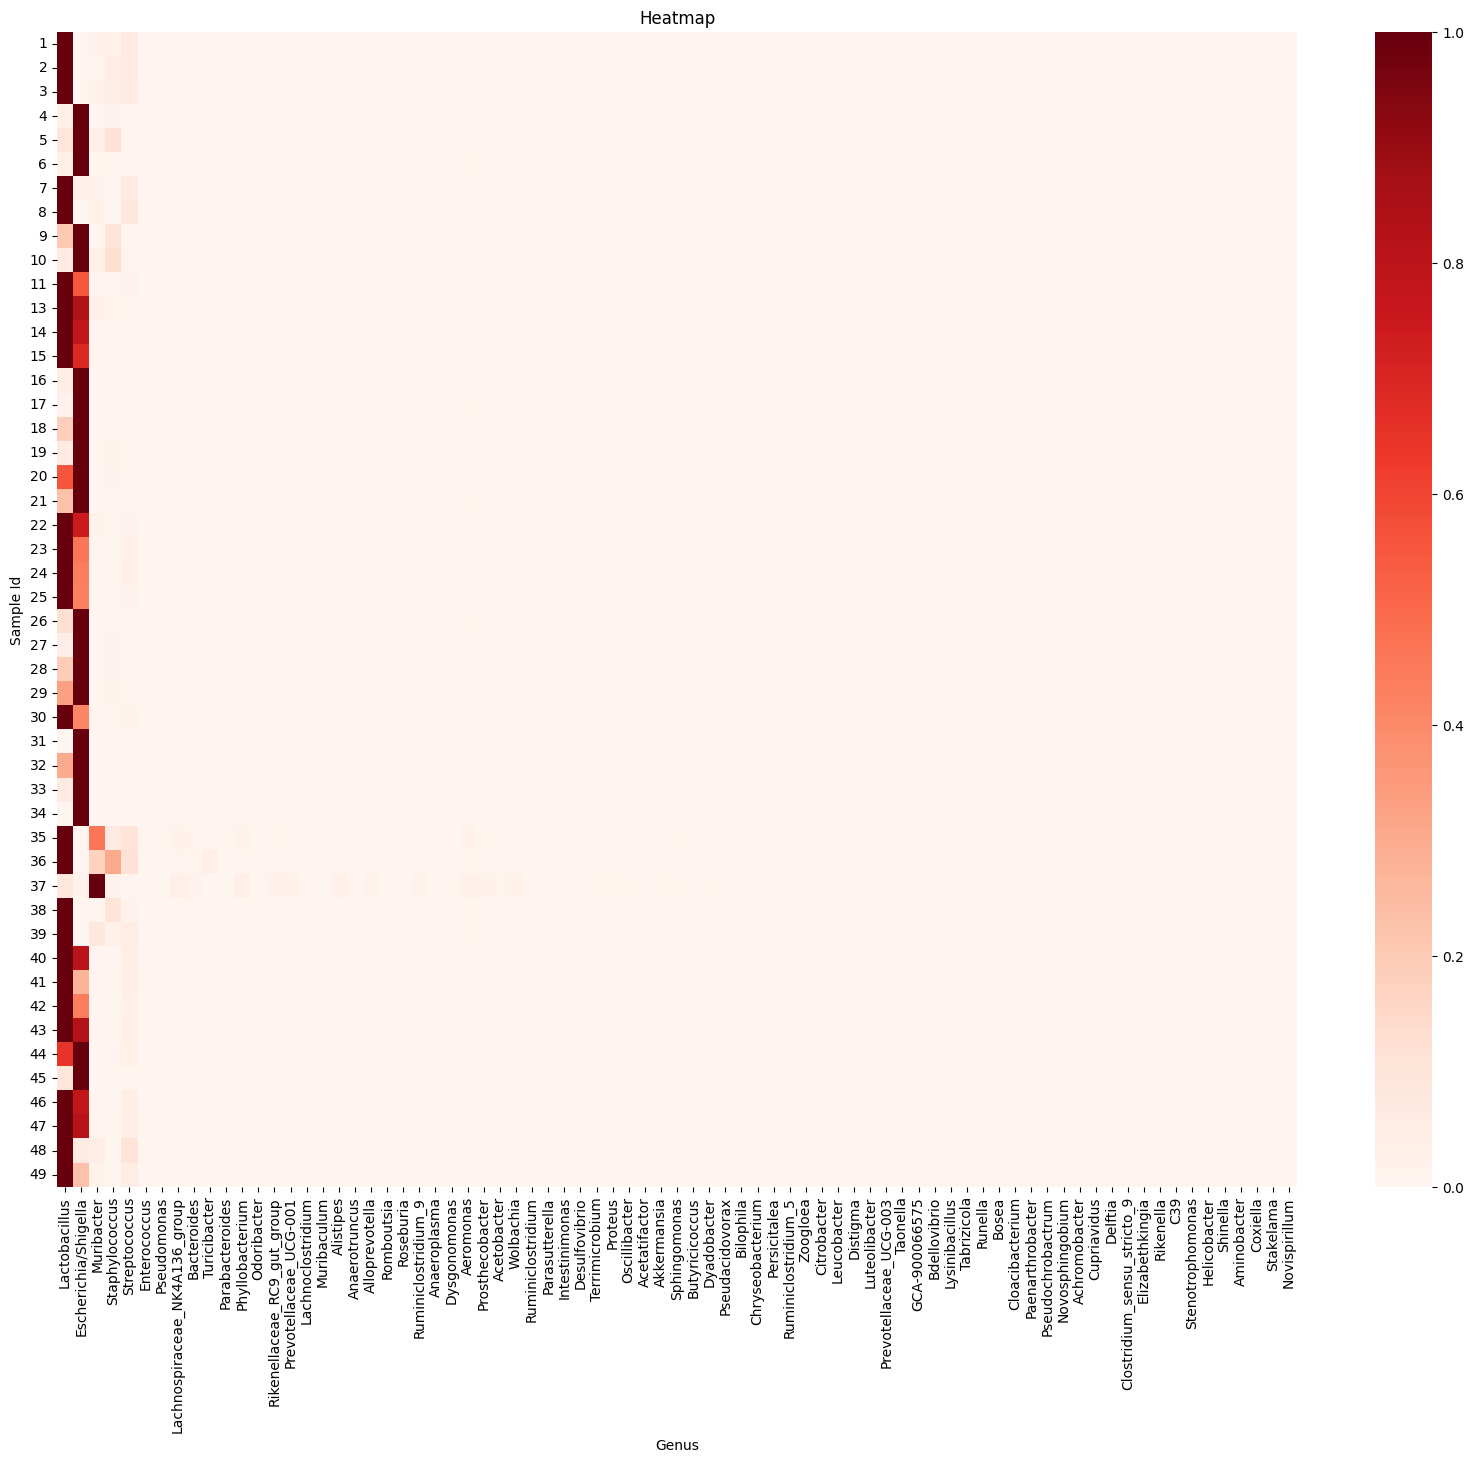

In [287]:
# Create a heatmap using seaborn
plt.figure(figsize=(20, 15))
sns.heatmap(merged_data, cmap='Reds',yticklabels=y_labels)
# Set title and labels
plt.title("Heatmap")
plt.xticks(rotation=90) 
plt.yticks(rotation=0)   
plt.xlabel("Genus")
plt.ylabel("Sample Id")

Non-normalized Data Analysis

In [288]:

data = pd.read_csv('genus_table_Umar_MPD.csv')
metadata = pd.read_csv('P8_C_F.csv')

# Convert columns to numeric
data.iloc[:, 1:] = data.iloc[:, 1:].apply(pd.to_numeric)
# Low count filter
minimum_count = 4
prevalence_threshold = 0.2
# Filter features based on minimum count and prevalence threshold
filtered_data = data[data.iloc[:, 1:].ge(minimum_count).sum(axis=1) / data.shape[1] >= prevalence_threshold]

# Low variance filter
variance_cutoff = 0.1
# Filter features based on variance
data = filtered_data[filtered_data.iloc[:, 1:].var(axis=1) >= variance_cutoff]
split_df = pd.concat([data['#NAME'].str.split(';', expand=True)], axis=1)
split_df.columns = ['Column_1', 'Column_2', 'Column_3','Column_4', 'Column_5','genus']
columns_to_remove = ['Column_1', 'Column_2', 'Column_3','Column_4', 'Column_5']
data = pd.concat([split_df,df], axis=1)
data = data[data['genus'] != 'NA']
data = data.drop(columns=columns_to_remove)
data.set_index('genus', inplace=True)
metadata.set_index('#NAME', inplace=True)
data = data.T
new_column = []
for index1 in data.index:
    for index2 in metadata.index:
        value = metadata.loc[index2, "Experiment"]
        if int(index1) == int(index2):
            new_column.append(value)
data['Experiment'] = new_column

In [289]:
data.head(10)

genus,Lactobacillus,Escherichia/Shigella,Muribacter,Staphylococcus,Streptococcus,Enterococcus,Pseudomonas,Lachnospiraceae_NK4A136_group,Bacteroides,Turicibacter,...,Rikenella,C39,Stenotrophomonas,Helicobacter,Shinella,Aminobacter,Coxiella,Stakelama,Novispirillum,Experiment
1,79024,112,1437,1673,5027,74,0,60,58,0,...,6,0,0,0,0,0,0,0,0,C
2,68214,119,1060,3455,4631,20,3,81,66,0,...,0,0,0,10,0,0,0,0,0,C
3,75562,87,1513,3156,4584,17,4,105,81,0,...,0,5,0,10,0,0,3,0,0,C
4,2245,71463,65,1148,50,105,0,351,220,10,...,15,7,13,0,21,13,0,19,6,F
5,5772,61929,2354,7138,505,56,0,249,185,0,...,0,13,0,0,22,9,3,14,0,F
6,1801,53539,571,521,162,246,14,739,326,9,...,0,24,15,10,0,0,0,41,0,F
7,76450,1279,1236,9,4832,22,0,72,53,0,...,0,0,0,0,0,0,0,0,4,C
8,67741,66,2123,13,5815,16,0,75,42,0,...,5,0,0,4,0,0,5,0,0,C
9,10408,51014,355,5367,177,77,0,206,126,0,...,27,0,0,5,0,0,0,0,0,F
10,4422,67843,1972,8590,826,57,9,128,81,0,...,3,0,3,0,0,0,0,0,0,F


In [290]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 48 entries, 1 to 49
Data columns (total 78 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   Lactobacillus                  48 non-null     int64 
 1   Escherichia/Shigella           48 non-null     int64 
 2   Muribacter                     48 non-null     int64 
 3   Staphylococcus                 48 non-null     int64 
 4   Streptococcus                  48 non-null     int64 
 5   Enterococcus                   48 non-null     int64 
 6   Pseudomonas                    48 non-null     int64 
 7   Lachnospiraceae_NK4A136_group  48 non-null     int64 
 8   Bacteroides                    48 non-null     int64 
 9   Turicibacter                   48 non-null     int64 
 10  Parabacteroides                48 non-null     int64 
 11  Phyllobacterium                48 non-null     int64 
 12  Odoribacter                    48 non-null     int64 
 13  Rikenellacea

Heatmap

Control group vs Feeding Group

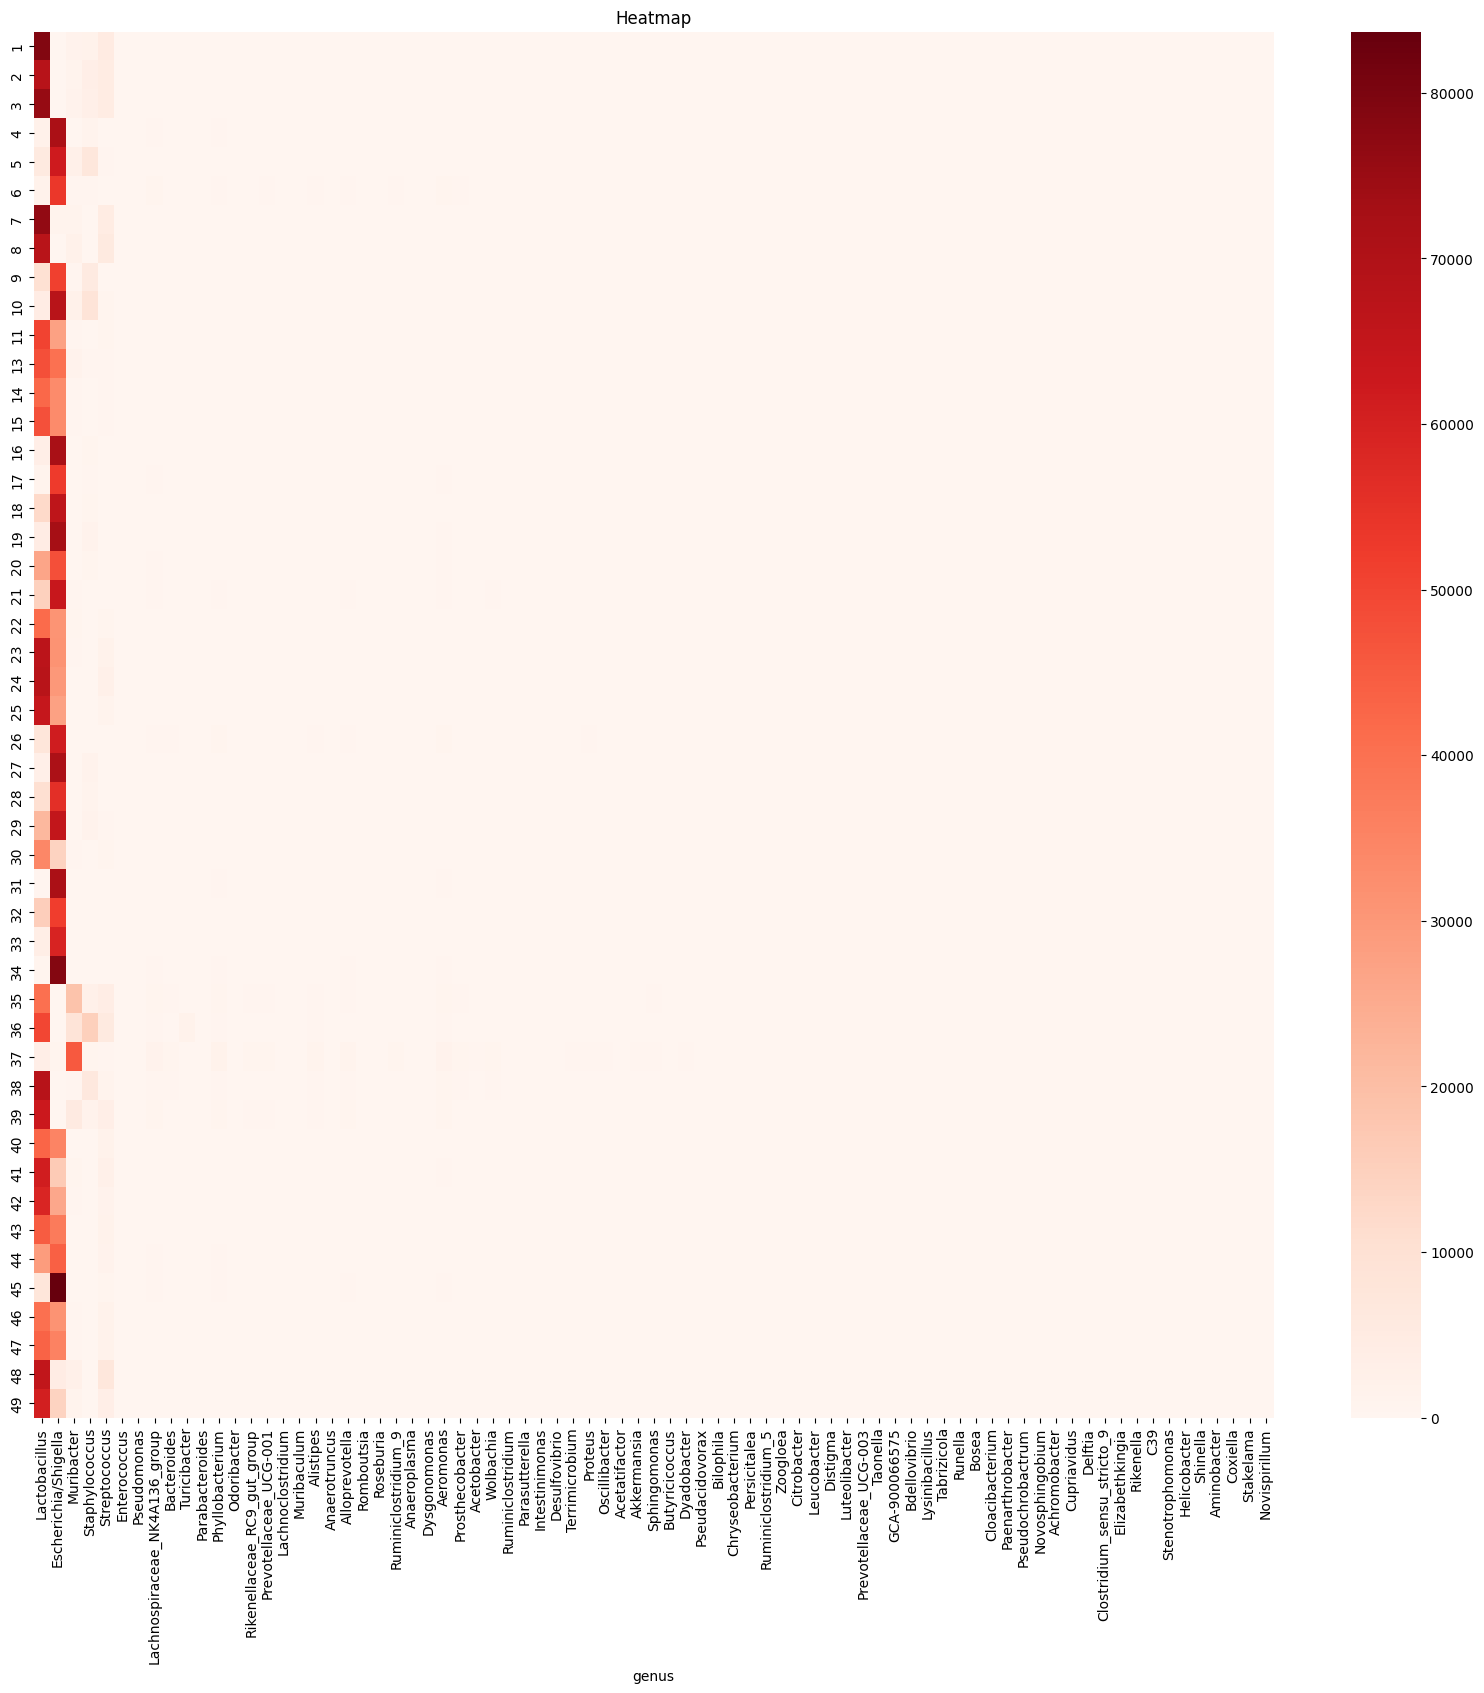

In [291]:
grp = data['Experiment'] 
origin_data = data
heatmap = data
data = data.drop('Experiment', axis=1)
plt.figure(figsize=(20, 18))
sns.heatmap(data, cmap='Reds')
plt.title('Heatmap')
plt.show()

In [292]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
# Standardize the data
heatmap.set_index('Experiment', inplace=True)

origin_data.index

Index(['C', 'C', 'C', 'F', 'F', 'F', 'C', 'C', 'F', 'F', 'C', 'C', 'C', 'C',
       'F', 'F', 'F', 'F', 'F', 'F', 'C', 'C', 'C', 'C', 'F', 'F', 'F', 'F',
       'C', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'C', 'C', 'C', 'C',
       'F', 'F', 'C', 'C', 'C', 'C'],
      dtype='object', name='Experiment')

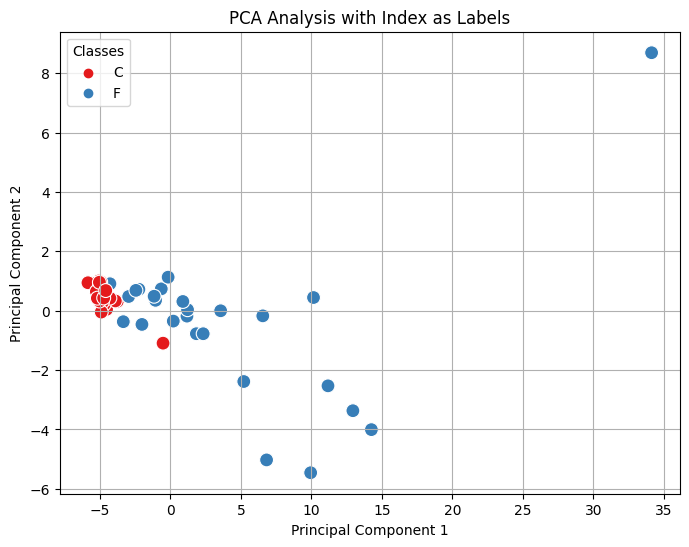

In [298]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(heatmap)
# Perform PCA
pca = PCA(n_components=2)
principal_components = pca.fit_transform(scaled_data)
# Create a DataFrame for the principal components
principal_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])
# Plot PCA groups using index as labels
plt.figure(figsize=(8, 6))
sns.scatterplot(x='PC1', y='PC2', data=principal_df, hue=heatmap.index, palette='Set1', s=100)
plt.title('PCA Analysis with Index as Labels')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True)
plt.legend(title='Classes')
plt.show()

In [299]:
origin_data.head(10)

genus,Lactobacillus,Escherichia/Shigella,Muribacter,Staphylococcus,Streptococcus,Enterococcus,Pseudomonas,Lachnospiraceae_NK4A136_group,Bacteroides,Turicibacter,...,Elizabethkingia,Rikenella,C39,Stenotrophomonas,Helicobacter,Shinella,Aminobacter,Coxiella,Stakelama,Novispirillum
Experiment,,,,,,,,,,,,,,,,,,,,,
C,79024,112,1437,1673,5027,74,0,60,58,0,...,5,6,0,0,0,0,0,0,0,0
C,68214,119,1060,3455,4631,20,3,81,66,0,...,4,0,0,0,10,0,0,0,0,0
C,75562,87,1513,3156,4584,17,4,105,81,0,...,0,0,5,0,10,0,0,3,0,0
F,2245,71463,65,1148,50,105,0,351,220,10,...,7,15,7,13,0,21,13,0,19,6
F,5772,61929,2354,7138,505,56,0,249,185,0,...,8,0,13,0,0,22,9,3,14,0
F,1801,53539,571,521,162,246,14,739,326,9,...,11,0,24,15,10,0,0,0,41,0
C,76450,1279,1236,9,4832,22,0,72,53,0,...,0,0,0,0,0,0,0,0,0,4
C,67741,66,2123,13,5815,16,0,75,42,0,...,0,5,0,0,4,0,0,5,0,0
F,10408,51014,355,5367,177,77,0,206,126,0,...,5,27,0,0,5,0,0,0,0,0
